<a href="https://colab.research.google.com/github/L-ansari/NLP/blob/master/scentic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install senticnet


     |████████████████████████████████| 51.9MB 58kB/s 


In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df_train= pd.read_csv(Path('/content/drive/My Drive/DSP/data/bachelor/train.csv'))


In [ ]:
df_train.head()

,label,text
0,depression_ctrl,Game over RT : Life is so unpredictable. Be gr...
1,depression,Happy ! Guys: please check your balls monthly ...
2,ptsd_ctrl,You gotta enjoy the view RT : i want a boyfrie...
3,ptsd_ctrl,I love that I'm so chill about everything RT :...
4,depression_ctrl,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...


In [ ]:
from senticnet.senticnet import SenticNet


In [ ]:
sn = SenticNet()
concept_info = sn.concept('love')
polarity_label = sn.polarity_label('love')
polarity_value = sn.polarity_value('love')
moodtags = sn.moodtags('love')
semantics = sn.semantics('love')
sentics = sn.sentics('love')

In [ ]:
print(concept_info )
print(polarity_label )
print(polarity_value )
print(moodtags )
print(semantics )
print(sentics )

{'polarity_label': 'positive', 'polarity_value': '0.83', 'sentics': {'introspection': '0.897', 'temper': '0', 'attitude': '0', 'sensitivity': '0.762'}, 'moodtags': ['#joy', '#eagerness'], 'semantics': ['desire_succeed', 'excitement', 'lust', 'passion', 'sexuality']}
positive
0.83
['#joy', '#eagerness']
['desire_succeed', 'excitement', 'lust', 'passion', 'sexuality']
{'introspection': '0.897', 'temper': '0', 'attitude': '0', 'sensitivity': '0.762'}


In [ ]:
print(type(float(polarity_value)))

<class 'float'>


In [ ]:
sentics['introspection']


'0.897'

In [ ]:
def get_feature(message):
  """This function gives out a dataframe of extracted features"""
  sn = SenticNet()

  polarity_value=0
  polarity_label=0
  introspection=0
  sensitivity=0
  temper=0
  attitude=0

  for word in (message):
    try:
      concept = sn.concept(word)
      pol_value = float(concept['polarity_value'])
      pol_label=concept['polarity_label']
      intros=float(concept['sentics']['introspection'])
      sensit=float(concept['sentics']['sensitivity'])
      temp=float(concept['sentics']['temper'])
      attit=float(concept['sentics']['attitude'])

      if  concept['polarity_label']=='positive':
        pol_label =1
      else:
        pol_label=0



      polarity_value += pol_value
      polarity_label +=pol_label
      introspection +=intros
      sensitivity +=sensit
      temper +=temp
      attitude +=attit

    except KeyError:
        pass
 
    
  return polarity_value , polarity_label, introspection, sensitivity, temper, attitude


In [ ]:
  #Test a sentence
sn = SenticNet()
get_feature(['I', 'love', 'books'])

(0.83, 1, 0.897, 0.762, 0.0, 0.0)

In [ ]:
#df_train['text'][1].lower()

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
sent = "This is my text, this is a nice way to input text."
word_tokenize(sent)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This',
 'is',
 'my',
 'text',
 ',',
 'this',
 'is',
 'a',
 'nice',
 'way',
 'to',
 'input',
 'text',
 '.']

In [ ]:
#first sentence of train data set
get_feature(word_tokenize(df_train['text'][1].lower()))

(2149.817000000051,
 6548,
 1670.337000000043,
 1431.5410000000136,
 44.2320000000002,
 639.5329999999973)

In [ ]:
df_train['polarity_value'] = 0
df_train['polarity_label'] = 0
df_train['sensitivity'] = 0
df_train['sensitivity'] = 0
df_train['introspection'] = 0
df_train['temper'] = 0
df_train['attitude'] = 0

df_train.head()

for i in range(df_train.shape[0]):
  polarity_value , polarity_label, introspection, sensitivity, temper, attitude=get_feature (word_tokenize(df_train['text'][i].lower()))
  df_train['polarity_value'][i] = polarity_value
  df_train['polarity_value'][i] = polarity_label
  df_train['sensitivity'][i] = sensitivity
  df_train['introspection'][i]= introspection
  df_train['temper'][i] = temper
  df_train['attitude'][i]= attitude




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_l

In [ ]:
df_train.head(10)


,label,text,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,depression_ctrl,Game over RT : Life is so unpredictable. Be gr...,3481,0,831,1040,38,209
1,depression,Happy ! Guys: please check your balls monthly ...,6548,0,1431,1670,44,639
2,ptsd_ctrl,You gotta enjoy the view RT : i want a boyfrie...,3044,0,656,914,-68,222
3,ptsd_ctrl,I love that I'm so chill about everything RT :...,3078,0,826,1233,-101,47
4,depression_ctrl,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...,3707,0,808,1607,-6,272
5,depression_ctrl,: New videooooOOOoooo at PM UK time!! RT : the...,2563,0,548,831,-78,22
6,depression,:,0,0,0,0,0,0
7,depression,new tweep followed me in the last week. I find...,3181,0,173,407,-177,166
8,ptsd,Pretty sure the cold weather is at least partl...,4636,0,991,1561,107,275
9,depression,RT : When you bang your toe against a table be...,2319,0,23,-6,-253,-17


In [ ]:
polarity_value , polarity_label, introspection, sensitivity, temper, attitude

(1434.986000000016,
 3516,
 1333.1680000000001,
 927.0289999999924,
 94.7319999999995,
 32.60699999999994)

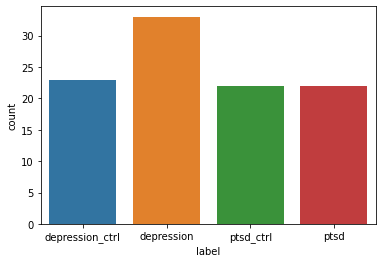

In [ ]:
sns.countplot(x = 'label', data=df_train)


In [ ]:
print(df_train['label'][1])

depression


In [ ]:
"""
df_train['label'] = df['label'].astype('category')

encode_map = {
    'depression': 1,
    'depression_ctrl': 0,
    'ptsd':0,
    'ptsd_ctrl':0
}

df['label'].replace(encode_map, inplace=True)
 """

"\ndf_train['label'] = df['label'].astype('category')\n\nencode_map = {\n    'depression': 1,\n    'depression_ctrl': 0,\n    'ptsd':0,\n    'ptsd_ctrl':0\n}\n\ndf['label'].replace(encode_map, inplace=True)\n "

In [ ]:
for i in range (0, (df_train.shape[0])):
  if (df_train['label'][i]=='depression' ) :
        
    df_train['label'][i]= 1 
  else:
        #False
    df_train['label'][i]= 0

df_train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,label,text,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0,Game over RT : Life is so unpredictable. Be gr...,3481,0,831,1040,38,209
1,1,Happy ! Guys: please check your balls monthly ...,6548,0,1431,1670,44,639
2,0,You gotta enjoy the view RT : i want a boyfrie...,3044,0,656,914,-68,222
3,0,I love that I'm so chill about everything RT :...,3078,0,826,1233,-101,47
4,0,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...,3707,0,808,1607,-6,272


In [ ]:
#scaler = StandardScaler()
#df_train = scaler.fit_transform(df_train)
features = df_train[["polarity_value", "polarity_label", "sensitivity", "introspection", "temper", "attitude"]]  
autoscaler = StandardScaler()
features[:] = autoscaler.fit_transform(features.values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [ ]:
features.head()

,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0.215175,0.0,0.219647,0.098545,0.351780,0.146265
1,2.021549,0.0,1.233556,0.959264,0.389721,2.423386
2,-0.042206,0.0,-0.076077,-0.073598,-0.318518,0.215108
3,-0.022181,0.0,0.211197,0.362226,-0.527195,-0.711627
4,0.348282,0.0,0.180780,0.873192,0.073543,0.479890


In [ ]:
# Normalize aquired values
df_train['polarity_value']=features['polarity_value']
df_train['polarity_label']=features['polarity_label']
df_train['sensitivity']=features['sensitivity']
df_train['introspection']=features['introspection']
df_train['temper']=features['temper']
df_train['attitude']=features['attitude']

df_train.head()

,label,text,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0,Game over RT : Life is so unpredictable. Be gr...,0.215175,0.0,0.219647,0.098545,0.351780,0.146265
1,1,Happy ! Guys: please check your balls monthly ...,2.021549,0.0,1.233556,0.959264,0.389721,2.423386
2,0,You gotta enjoy the view RT : i want a boyfrie...,-0.042206,0.0,-0.076077,-0.073598,-0.318518,0.215108
3,0,I love that I'm so chill about everything RT :...,-0.022181,0.0,0.211197,0.362226,-0.527195,-0.711627
4,0,Photo: lkfrannyfrano: hotshxxt: migzfromatx: s...,0.348282,0.0,0.180780,0.873192,0.073543,0.479890


In [ ]:
uniqueValues = df_train['label'].unique()
print(uniqueValues)


[0 1]


In [ ]:
def get_avg_polarity(message):
  sn = SenticNet()
  count = 0
  summ = 0
  polarity=0
  for word in (message):
    try:
      concept = sn.concept(word)
      polarity = float(concept['polarity_value'])
      print(polarity)
      print(count)
      #break
    except KeyError:
        pass
 
    summ += polarity
    count += 1
  print(summ)
  print(count)
  return summ/count if count>0 else 0


In [ ]:
get_avg_polarity(['I', 'book', 'love'])

0.83
2
0.83
3


0.27666666666666667

In [ ]:
!pip install twitter

     |████████████████████████████████| 61kB 3.2MB/s 


In [ ]:
#import urllib2
#import twitter
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import EnglishStemmer
import re
from senticnet.senticnet import SenticNet

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
import urllib


In [ ]:
def get_words_bag(message):
  wnl = WordNetLemmatizer()
  es = EnglishStemmer()
  for word in re.finditer("\w+", message):
    yield (wnl.lemmatize(word.group()), es.stem(word.group()))

def get_avg_polarity(message):
  threshold = 0.3
  sn = SenticNet()
  count = 0
  summ = 0
  for word_options in get_words_bag(message):
    polarity = 0
    for word in word_options:
      try:
        concept = sn.concept(word)
        polarity = concept['polarity']
        break
      except urllib.error.HTTPError:
        pass #Do next
    if abs(polarity) > threshold:
      summ += polarity
      count += 1

  return summ / count if count > 0 else 0


In [ ]:
import torch
import torch.nn as nn
import torch.utils.data as data_utils
import numpy as np
import torch.optim as optim
import torch.nn.functional as F



In [ ]:
df_train['label'][1]
#torch.LongTensor(0)



1

In [ ]:
labels_train=torch.tensor(df_train['label'][1], dtype=torch.long)
print(labels_train)
labels_train.view(1,)


tensor(1)


tensor([1])

In [ ]:
print(type(df_train.iloc[0,2:]))

<class 'pandas.core.series.Series'>


In [ ]:
word_vec = torch.zeros(6)

In [ ]:
for i in range (6):
    word_vec[i]= df_train.iloc[5,2:][i]
print(word_vec)
print(word_vec.shape)
word_vec.view(1,-1)
print(word_vec.shape)


tensor([-0.3255,  0.0000, -0.2586, -0.1870, -0.3818, -0.8440])
torch.Size([6])
torch.Size([6])


In [ ]:
"""feature_number=6 #corpus_size
for i in range(dataframe.shape[0]):
  word_vec = torch.zeros(feature_number) for word in sentence:
  word_vec[i] += 1
return word_vec.view(1, -1)"""



'feature_number=6 #corpus_size\nfor i in range(dataframe.shape[0]):\n  word_vec = torch.zeros(feature_number) for word in sentence:\n  word_vec[i] += 1\nreturn word_vec.view(1, -1)'

In [ ]:
class Classifier(nn.Module):  
  """cinsists of a single linear layer with log softmax activation, approximating a logistic regression"""
  def __init__(self, no_classes, feature_size): 
    super(Classifier, self).__init__() 

    self.linear = nn.Linear(feature_size, no_classes) #input & output size

  def forward(self, bow_vec): 
    return F.log_softmax(self.linear(bow_vec), dim=1) #gives out probabilities



In [ ]:
no_classes=2
feature_size=6
model = Classifier(no_classes, feature_size)
loss_function = nn.NLLLoss() # Negative log likelihood
optimizer = optim.SGD(model.parameters(), lr=0.01) 


In [ ]:
for epoch in range(100): 
  #for sentence, label in training_data: 
  for i in range(df_train.shape[0]):
    model.zero_grad() 
    word_vec = torch.zeros(6)

    for j in range (6):
      word_vec[j]= df_train.iloc[i,2:][j]
    word_vec=word_vec.view(1,-1)

    target = torch.tensor(df_train['label'][i], dtype=torch.long)
    target=target.view(1,)

    log_probs = model(word_vec)  #Forward
    loss = loss_function(log_probs, target) 
    loss.backward()
    optimizer.step() #Update parameters
  if epoch % 10 == 0: 
    print('Epoch: ',str(epoch+1),', Loss: ' +                         str(loss.item()))



Epoch:  1 , Loss: 0.6116650700569153
Epoch:  11 , Loss: 0.41470834612846375
Epoch:  21 , Loss: 0.4117603302001953
Epoch:  31 , Loss: 0.4051523208618164
Epoch:  41 , Loss: 0.3995056748390198
Epoch:  51 , Loss: 0.39557868242263794
Epoch:  61 , Loss: 0.3929850161075592
Epoch:  71 , Loss: 0.3913000822067261
Epoch:  81 , Loss: 0.39021533727645874
Epoch:  91 , Loss: 0.3895242512226105


In [ ]:
word_vec = torch.zeros(6)
for i in range (6):
    word_vec[i]= df_train.iloc[5,2:][i]
print(word_vec)
print(word_vec.shape)
word_vec=word_vec.view(1,-1)
print(word_vec.shape)
print(word_vec)

tensor([-0.3255,  0.0000, -0.2586, -0.1870, -0.3818, -0.8440])
torch.Size([6])
torch.Size([1, 6])
tensor([[-0.3255,  0.0000, -0.2586, -0.1870, -0.3818, -0.8440]])


In [ ]:
def make_predictions(word_vec): 
  with torch.no_grad(): #deactivate the autograd 
    #sentence = data[0] 
    label = "one"
    log_probs = model(word_vec) 
    #print(sentence) 
    print(label + ':') #true label 
    print(np.exp(log_probs)) # convert the log probabilities into probabilities
    return np.exp(log_probs)  #first probability i.e., index 0 refers to 0th class i.e. not depression

a=make_predictions(word_vec)
a.sum()



one:
tensor([[0.5885, 0.4115]])


tensor(1.)

In [ ]:
X = df_train.iloc[:, 2:]
y = df_train.iloc[:, 0]

print(type(X))
X.head()


<class 'pandas.core.frame.DataFrame'>


,polarity_value,polarity_label,sensitivity,introspection,temper,attitude
0,0.215175,0.0,0.219647,0.098545,0.351780,0.146265
1,2.021549,0.0,1.233556,0.959264,0.389721,2.423386
2,-0.042206,0.0,-0.076077,-0.073598,-0.318518,0.215108
3,-0.022181,0.0,0.211197,0.362226,-0.527195,-0.711627
4,0.348282,0.0,0.180780,0.873192,0.073543,0.479890


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: label, dtype: object

In [ ]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69)

In [ ]:
#Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
EPOCHS = 200
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [ ]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train), 
                       torch.FloatTensor(y_train))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 6.
        self.layer_1 = nn.Linear(6, 64)  # The input to the first linear layer is 6. 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs): # Takes the input. 
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x) # No sigmoid here since BCEWithLogitsLoss applies sigmoid automatically. 
        
        return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss() # Used when the output from the network is a tensor of length 2 (final dense layer is of size 2) where both values lie between 0 and 1.
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=6, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.69961 | Acc: 61.500
Epoch 002: | Loss: 0.71833 | Acc: 47.000
Epoch 003: | Loss: 0.50394 | Acc: 79.500
Epoch 004: | Loss: 0.55288 | Acc: 64.500
Epoch 005: | Loss: 0.62894 | Acc: 67.000
Epoch 006: | Loss: 0.60045 | Acc: 68.500
Epoch 007: | Loss: 0.72345 | Acc: 69.500
Epoch 008: | Loss: 0.69801 | Acc: 51.500
Epoch 009: | Loss: 0.52167 | Acc: 67.000
Epoch 010: | Loss: 0.67057 | Acc: 54.000
Epoch 011: | Loss: 0.58241 | Acc: 70.000
Epoch 012: | Loss: 0.60021 | Acc: 54.000
Epoch 013: | Loss: 0.48087 | Acc: 69.500
Epoch 014: | Loss: 0.60426 | Acc: 72.500
Epoch 015: | Loss: 0.48187 | Acc: 86.000
Epoch 016: | Loss: 0.68942 | Acc: 72.500
Epoch 017: | Loss: 0.45808 | Acc: 88.500
Epoch 018: | Loss: 0.63402 | Acc: 36.500
Epoch 019: | Loss: 0.65824 | Acc: 74.000
Epoch 020: | Loss: 0.41233 | Acc: 88.500
Epoch 021: | Loss: 0.61443 | Acc: 72.000
Epoch 022: | Loss: 0.46105 | Acc: 71.000
Epoch 023: | Loss: 0.64383 | Acc: 72.000
Epoch 024: | Loss: 0.39319 | Acc: 87.500
Epoch 025: | Los

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [ ]:
print(y_test[:10])
print("--------------")
print(y_pred_list[:10])
y_test = [ int(x) for x in y_test ]

y_pred_list = [ int(x) for x in y_pred_list ]


72    0
31    0
13    0
83    1
33    1
8     0
26    1
89    1
64    1
97    1
Name: label, dtype: object
--------------
[0, 0, 0, 1, 0, 0, 0, 0, 0, 1]


In [ ]:
confusion_matrix(y_test, y_pred_list)

array([[14,  3],
       [13,  3]])

In [ ]:
print(classification_report(y_test, y_pred_list))


              precision    recall  f1-score   support

           0       0.52      0.82      0.64        17
           1       0.50      0.19      0.27        16

    accuracy                           0.52        33
   macro avg       0.51      0.51      0.45        33
weighted avg       0.51      0.52      0.46        33

